In [63]:
import pandas as pd

In [64]:
df = pd.read_csv("E:/21KDT-Project-master/4. dms_seoul_avg.csv")
df.head()

,date,mosquito,temp,rain_per_day,accum_rain,wind,humidity,sunshine
0,2015-04-06,199,12.214286,5.285714,0,3.371429,68.757143,8.880000
1,2015-04-07,146,11.571429,4.928571,0,3.428571,65.742857,9.891429
2,2015-04-08,90,10.914286,4.571429,0,3.257143,63.542857,9.927143
3,2015-04-09,172,10.171429,0.571429,0,2.871429,59.614286,10.884286
4,2015-04-10,249,10.314286,0.071429,0,2.871429,53.485714,12.777143


In [65]:
# 표준화

from sklearn.preprocessing import StandardScaler
features = ['mosquito','temp','rain_per_day','accum_rain','wind','humidity','sunshine']
df2 = pd.DataFrame(df,columns=features)

scaler = StandardScaler()
scaler.fit(df2)
df1_scaled = scaler.transform(df2) # fit, transform을 따로하지 않고 fit_transform 이렇게 해도 결과는 같다.
# df1_scaled은 타입이 numpy.ndarray인데 이것은 head() 메소드 작동을 못함으로 DataFrame 형식으로 바꿔주어야한다. 

df1 = pd.DataFrame(data = df1_scaled, columns =['mosquito','temp','rain_per_day','accum_rain','wind','humidity','sunshine'])
df1.head()

,mosquito,temp,rain_per_day,accum_rain,wind,humidity,sunshine
0,-1.279234,-2.015842,0.078619,-0.353865,2.645087,0.527952,-1.572297
1,-1.300858,-2.151781,0.029241,-0.353865,2.768611,0.231246,-1.340929
2,-1.323707,-2.290741,-0.020137,-0.353865,2.398040,0.014692,-1.332759
3,-1.290250,-2.447826,-0.573167,-0.353865,1.564257,-0.372010,-1.113808
4,-1.258833,-2.417617,-0.642296,-0.353865,1.564257,-0.975265,-0.680809


In [66]:
df_X = df1.drop(['mosquito'], axis=1)
df_y = df1['mosquito']

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=121)

In [69]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

gbm = lgb.LGBMRegressor(n_estimators = 64)
gbm.fit(X_train, y_train, eval_metric = 'l2', eval_set = [(X_test, y_test)], early_stopping_rounds = 10, verbose = False)

y_pred = gbm.predict(X_test, num_iteration = gbm.best_iteration_)
print('Best Iteration:', gbm.best_iteration_)
print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2: {:.3f}'.format(np.sqrt(r2_score(y_test, y_pred))))

Best Iteration: 40
RMSE: 0.615
R2: 0.743


In [54]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

gbm = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
gbm.fit(X_train, y_train, eval_metric = 'l2', eval_set = [(X_test, y_test)], early_stopping_rounds = 10, verbose = False)

y_pred = gbm.predict(X_test, num_iteration = gbm.best_iteration_)
print('Best Iteration:', gbm.best_iteration_)
print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2: {:.3f}'.format(np.sqrt(r2_score(y_test, y_pred))))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Best Iteration: 168
RMSE: 0.748
R2: 0.581


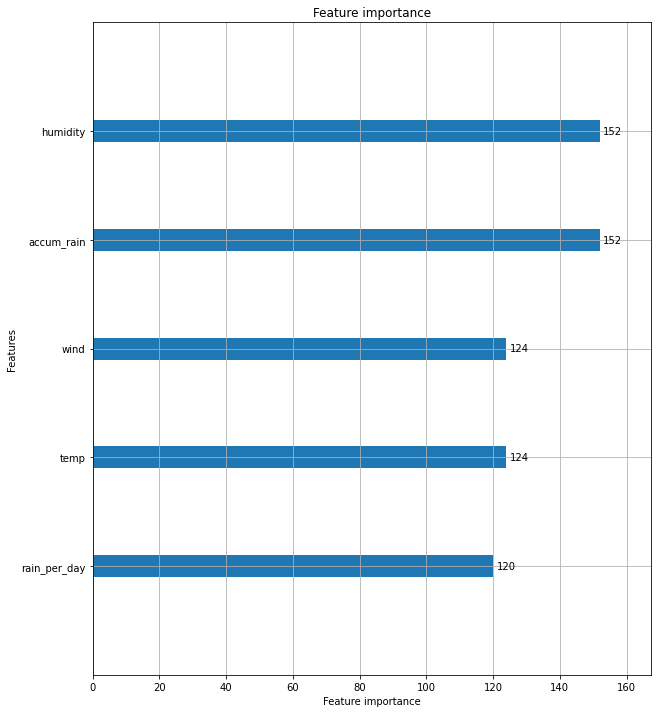

In [56]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
#%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(gbm, ax=ax)